<h2> DATA 115: Introduction to Data Analytics. Fall 2024 </h2>
<h3> Problem Set 4 </h3>
<h3> Team <i> 4 </i></h3>
<h3> <ul>
    <li>Melvin Manning</li> 
    <li>Max Durben</li> 
    <li>Nathan Feltmann</li> 
    <li>Jack Palmer</li>
    <i> (only those who contributed to the group work)</i> 
    <li>Melvin Manning</li>
    <li>Jack Palmer </li>
    <li>Nathan Feltman</li>
    <li>Max Durben </li>
    </h3>

#### 1. In your own words, write brief answers to the following questions:

##### (a) What is the curse of dimensionality?

###### (i) When you have a lot of features in your data the space gets large and the points spread out. This makes it hard for many methods(functions) to find patterns because there is not enough data in each part of the space

##### (b) What is the difference between MDS and PCA?

###### (i) Principal Component Analysis - Finds new directions in the data that show the largest variation. It creates new features that help summarize the data

###### (ii) Multidimensional Scaling - Focuses on keeping the distances between data points similar to the original distances when mapping them to a lower number of dimensions. 

###### (iii) PCA is about capturing the most variation, while MDS is about remembering how far seperated data points are

##### (c) Give an example of a dataset for which dimension reduction would be a useful first step.

###### (i) A good example would be datasets containing genes. Genes are ,by nature, long and confusing. Reducing the dimension can help find patterns.

##### (d) What is a dendrogram and what type of clustering method is it used to represent?

###### (i) A dendrogram is a tree diagram that shows how individual items group together as you form larger clusters

##### (e) What is the difference between supervised and unsupervised learning?

###### (i) Supervised Learning - The algorithm learns from examples that come with known answers. For instance, teaching a computer to recognize bikes by showing it labeled pictures of bikes and not bikes

###### (i) Unsupervised Learning - The algorithm finds patterns in data that with no labels. It groups and organizes the data by itself. For instance grouping gamers with simular interest

#### 2. Load the data in `iris_data` as a dataframe in Python. This is a classic dataset (originally published in 1936) that is frequently used as an initial set of test data. It consists of four numerical columns reporting the length and width of the sepal and petals of 150 iris plants and a final column reporting the specific subspecies. The data file also has an additional column with numerical column representing the subspecies. 

##### (a) Make a scatterplot of petal width vs. petal length colored by the subspecies.

##### (b) Perform PCA on the data with the four numerical columns as inputs and make a scatter plot of the top two principal components colored by subspecies.

##### (c) What proportion of the variance is explained by these two components?

##### (d) What are the loadings for each of the original numerical columns?

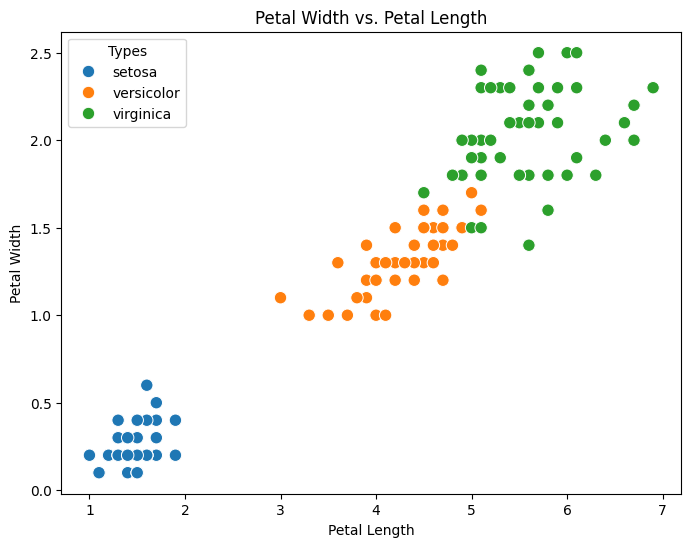

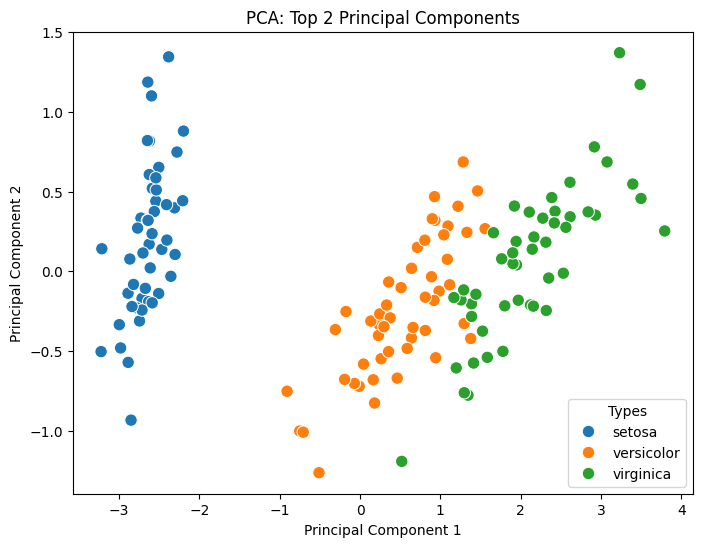

Proportion of variance explained by PC1 and PC2: 0.9776317750248054
Variance explained by PC1: 92.46%
Variance explained by PC2: 5.30% 



Loadings for each original feature:
                   PC1       PC2
sepal_length  0.361590  0.656540
sepal_width  -0.082269  0.729712
petal_length  0.856572 -0.175767
petal_width   0.358844 -0.074706


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

df = pd.read_csv("iris_data.csv")
# --------------------------------------------------------------------------------
# (a) Make a scatterplot of petal width vs. petal length colored by the subspecies

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='type', s=80)
plt.title('Petal Width vs. Petal Length')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(title='Types')
plt.show()

# -----------------------------------------------------------------------------------------------
# (b) Perform PCA on the four numerical columns and make a scatter plot of the top two components

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

X = df[features].values

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pc_df['species'] = df['type']

plt.figure(figsize=(8,6))
sns.scatterplot(data=pc_df, x='PC1', y='PC2', hue='species', s=80)
plt.title('PCA: Top 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Types')
plt.show()

# ------------------------------------------------------------
# (c) Proportion of variance explained by these two components

varianceExplained = pca.explained_variance_ratio_
total_variance_explained = varianceExplained.sum()
print("Proportion of variance explained by PC1 and PC2:", total_variance_explained)
print("Variance explained by PC1: {:.2f}%".format(varianceExplained[0]*100))
print("Variance explained by PC2: {:.2f}% \n\n\n".format(varianceExplained[1]*100))

# -------------------------------------------------------
# (d) Loadings for each of the original numerical columns

loadings = pd.DataFrame(pca.components_.T, index=features, columns=['PC1', 'PC2'])
print("Loadings for each original feature:")
print(loadings)

#### 3. Continue working with `iris_data` dataframe.

##### (a) Apply k-means clustering to the four numeric columns with three clusters.

##### (b) Apply k-means clustering to the two principal components with three clusters.

##### (c) Which of the two k-means clusterings is more accurate at predicting the subspecies correctly?